# Análise dos assaltos nos EUA segundo dados do FBI de 2017 a 2022


**Alunos:**

- Gabriel Varoli Fernandes -13874441
- Marcelo Henrique Joaquim Coelho - 13862563
- Roger Ferreira - 13715662


**Questão fundamental a se resolver:** O que aconteceu com os assaltos nos EUA durante o período de 2017 a 2022?


**Biliotecas necessárias:**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
import zipfile
import os
from sklearn.preprocessing import StandardScaler

**Importação dos Dados:**

Importamos dados referentes à quantidade de assaltos em todo o território dos Estados Unidos da América durante o período de janeiro de 2017 a dezembro de 2022 a fim de analisar quais os diferentes tipos de pessoas cometeram tal crime. Os dados foram obtidos através do site do FBI. Para facilitar a manipulação dos dados, eles foram compactados em uma pasta zip.

In [2]:
uploaded = files.upload()


Saving dados_assaltos2.zip to dados_assaltos2.zip


# Limpeza, Transformação e Padronização dos Dados

Após a importação dos dados, foi realizado um processo de limpeza, padronização e de organização dos dados para que seja possível fazermos uma boa análise. Os dados são provenientes do arquivo compactado dados_assaltos.zip. Os dados no arquivo estão distribuídos em subpastas que representam o ano dentro do período escolhido sendo subpasta composta por quatro arquivos distintos referentes a categorias demográficas de pessoas presas nos EUA. Essa estrutura exigiu um fluxo de tratamento adequado para integrar os anos e categorias em um único conjunto consolidado e consistente.

In [3]:
zip_path = list(uploaded.keys())[0]

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("dados_assaltos2")


In [4]:
for root, dirs, files in os.walk("dados_assaltos2"):
    for f in files:
        print(os.path.join(root, f))


dados_assaltos2/dados_assaltos2/2021/Male Arrests By Age_11-17-2025.csv
dados_assaltos2/dados_assaltos2/2021/Arrestee Race_11-17-2025.csv
dados_assaltos2/dados_assaltos2/2021/Arrestee Sex_11-17-2025.csv
dados_assaltos2/dados_assaltos2/2021/Female Arrests By Age_11-17-2025.csv
dados_assaltos2/dados_assaltos2/2020/Male Arrests By Age_11-17-2025.csv
dados_assaltos2/dados_assaltos2/2020/Arrestee Race_11-17-2025.csv
dados_assaltos2/dados_assaltos2/2020/Arrestee Sex_11-17-2025.csv
dados_assaltos2/dados_assaltos2/2020/Female Arrests By Age_11-17-2025.csv
dados_assaltos2/dados_assaltos2/2017/Male Arrests By Age_11-17-2025.csv
dados_assaltos2/dados_assaltos2/2017/Arrestee Race_11-17-2025.csv
dados_assaltos2/dados_assaltos2/2017/Arrestee Sex_11-17-2025.csv
dados_assaltos2/dados_assaltos2/2017/Female Arrests By Age_11-17-2025.csv
dados_assaltos2/dados_assaltos2/2018/Male Arrests By Age_11-17-2025.csv
dados_assaltos2/dados_assaltos2/2018/Arrestee Race_11-17-2025.csv
dados_assaltos2/dados_assaltos2

In [21]:
dfs2 = {}

for root, dirs, files in os.walk("dados_assaltos2"):
    for file in files:
        if file.endswith(".csv"):
            caminho = os.path.join(root, file)
            dfs2[file] = pd.read_csv(caminho)
            print(f"Lido: {file} → {dfs2[file].shape}")


Lido: Male Arrests By Age_11-17-2025.csv → (26, 2)
Lido: Arrestee Race_11-17-2025.csv → (9, 2)
Lido: Arrestee Sex_11-17-2025.csv → (2, 2)
Lido: Female Arrests By Age_11-17-2025.csv → (26, 2)
Lido: Male Arrests By Age_11-17-2025.csv → (26, 2)
Lido: Arrestee Race_11-17-2025.csv → (9, 2)
Lido: Arrestee Sex_11-17-2025.csv → (2, 2)
Lido: Female Arrests By Age_11-17-2025.csv → (26, 2)
Lido: Male Arrests By Age_11-17-2025.csv → (26, 2)
Lido: Arrestee Race_11-17-2025.csv → (9, 2)
Lido: Arrestee Sex_11-17-2025.csv → (2, 2)
Lido: Female Arrests By Age_11-17-2025.csv → (26, 2)
Lido: Male Arrests By Age_11-17-2025.csv → (26, 2)
Lido: Arrestee Race_11-17-2025.csv → (9, 2)
Lido: Arrestee Sex_11-17-2025.csv → (2, 2)
Lido: Female Arrests By Age_11-17-2025.csv → (26, 2)
Lido: Male Arrests By Age_11-17-2025.csv → (26, 2)
Lido: Arrestee Race_11-17-2025.csv → (9, 2)
Lido: Arrestee Sex_11-17-2025.csv → (2, 2)
Lido: Female Arrests By Age_11-17-2025.csv → (26, 2)
Lido: Male Arrests By Age_11-17-2025.csv → (2

In [22]:
for nome, df in dfs2.items():
    print(f"\nArquivo: {nome}")
    print(df.columns.tolist())



Arquivo: Male Arrests By Age_11-17-2025.csv
['key', 'value']

Arquivo: Arrestee Race_11-17-2025.csv
['key', 'value']

Arquivo: Arrestee Sex_11-17-2025.csv
['key', 'value']

Arquivo: Female Arrests By Age_11-17-2025.csv
['key', 'value']


Cada pasta referente ao ano continha as seguintes categorias: faixa etária feminina, faixa etária masculina, distribuição por raça e distribuição por sexo. Todos os arquivos mantêm  o mesmo formato de duas colunas. Graças a essa padronização estrutural, foi possível construirmos um pipeline uniforme de limpeza.
Durante a varredura dos dados, o ano foi extraído diretamente do nome da pasta que continha cada arquivo. De forma semelhante, a categoria foi inferida a partir do nome de cada arquivo. Por fim, essas informações foram incorporadas como novas colunas no dataframe: ano e tipo. Isso é importante para que possamos fazer comparações interanuais entre categorias e análises consolidadas.


Após o tratamento das tabelas, todas passaram pelos seguintes procedimentos:
Fizemos uma renomeação das colunas, agora passaram a se chamar categoria e quantidade.
Fizemos a conversão e validação dos tipos de dados. As colunas de categorias foram transformadas em strings, com remoção de espaços e caracteres excedentes enquanto as colunas de quantidade foram convertidas para valores numéricos.
As linhas com valores nulos foram removidas e verificamos que todos os arquivos possuíam o mesmo conjunto de categorias e estrutura entre os anos.
Por fim, todos os dados foram concatenados em um único dataframe contendo ano, tipo, categoria e quantidade.


In [23]:
dados_anuais = []

for root, dirs, files in os.walk("dados_assaltos2"):
    for file in files:
        if file.endswith(".csv"):
            caminho = os.path.join(root, file)

            # extrair ano da pasta
            ano = root.split("/")[-1]

            # identificar tipo de categoria
            if "Female Arrests By Age" in file:
                tipo = "female_age"
            elif "Male Arrests By Age" in file:
                tipo = "male_age"
            elif "Arrestee Race" in file:
                tipo = "race"
            elif "Arrestee Sex" in file:
                tipo = "sex"
            else:
                tipo = "desconhecido"

            # carregar CSV
            df = pd.read_csv(caminho)

            # renomear colunas
            df.columns = ["categoria", "quantidade"]

            # adicionar ano e tipo
            df["ano"] = int(ano)
            df["tipo"] = tipo

            # converter quantidade
            df["quantidade"] = pd.to_numeric(df["quantidade"], errors="coerce")

            dados_anuais.append(df)

# concatenar tudo
df_final = pd.concat(dados_anuais, ignore_index=True)

df_final


,categoria,quantidade,ano,tipo
0,25-29,27198,2021,male_age
1,30-34,26168,2021,male_age
2,35-39,21454,2021,male_age
3,40-44,15772,2021,male_age
4,45-49,10240,2021,male_age
...,...,...,...,...
373,10-12,609,2019,female_age
374,Juvenile Other,475,2019,female_age
375,Under 10,18,2019,female_age
376,11-12,0,2019,female_age


In [24]:
df_sex = df_final[df_final["tipo"] == "sex"]


In [25]:
df_race = df_final[df_final["tipo"] == "race"]


In [26]:
df_female_age = df_final[df_final["tipo"] == "female_age"]
df_male_age   = df_final[df_final["tipo"] == "male_age"]


Para enriquecer as análises e possibilitar comparações proporcionais entre categorias, foi adicionada uma coluna percentual, calculada como:

\[
\text{percentual}_{i,\, a,\, t} =
\frac{\text{quantidade}_{i,\, a,\, t}}
     {\displaystyle \sum_{j=1}^{n}
      \text{quantidade}_{j,\, a,\, t}}
     \times 100,
\]\\

Esse cálculo foi realizado separadamente para cada combinação de ano e tipo de categoria. Dessa forma, garantiu-se que cada análise representasse corretamente a distribuição interna de cada ano.


In [27]:
df_final["percentual"] = (
    df_final.groupby(["ano", "tipo"])["quantidade"]
    .apply(lambda x: x / x.sum() * 100)
    .reset_index(level=[0,1], drop=True)
)


**Resultado Final da Limpeza**

Ao término da etapa de limpeza, todos os dados estavam:

✔ Padronizados em um único formato


✔ Enriquecidos com informações de ano e categoria


✔ Convertidos para tipos adequados


✔ Estruturados no formato tidy data


✔ Prontos para análises comparativas entre anos


✔ Preparados para visualizações como gráficos de barras, linhas e séries temporais anuais


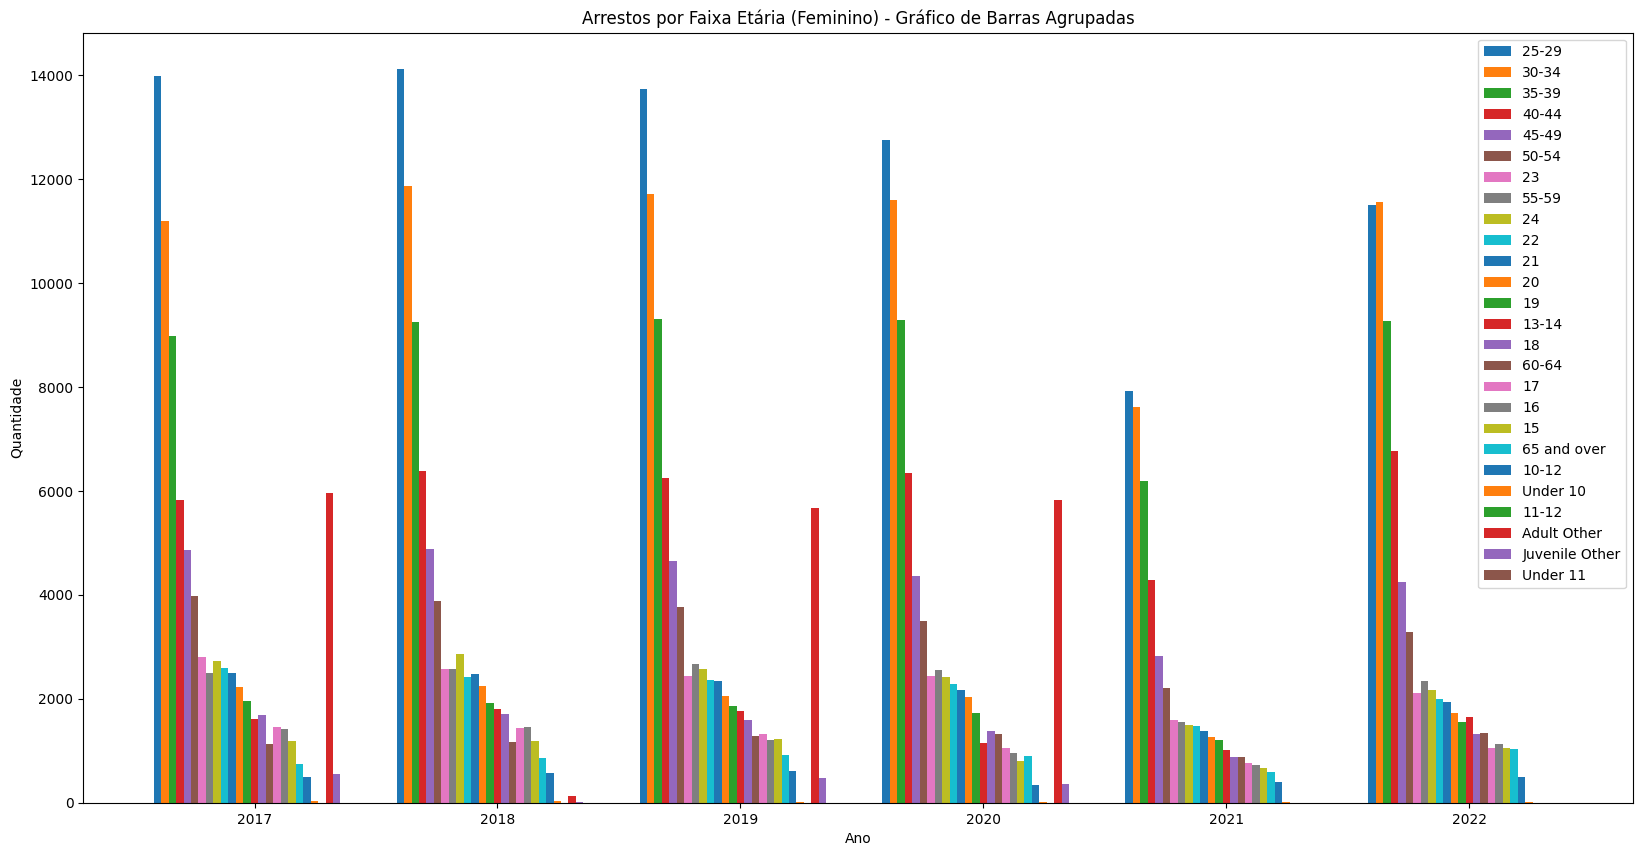

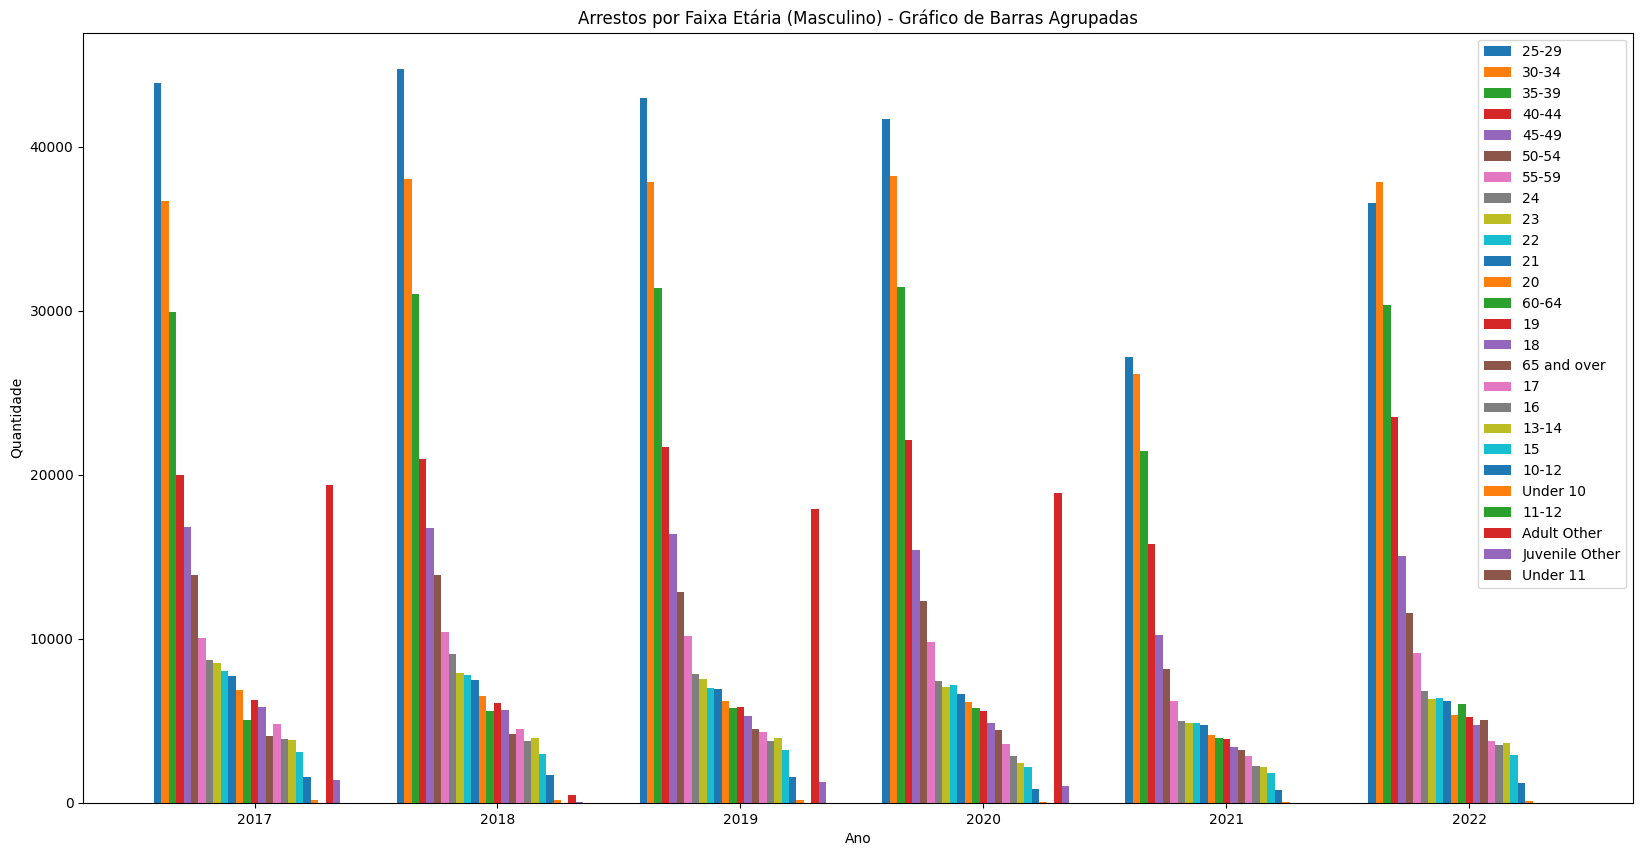

In [28]:
# unzip if not already
zip_path = "/content/dados_assaltos2.zip"

extract_dir = "/content/dados_assaltos2"
if not os.path.exists(extract_dir):
    with zipfile.ZipFile(zip_path, 'r') as z:
        z.extractall(extract_dir)
# load data
dfs = []
for root, dirs, files in os.walk(extract_dir):
    for f in files:
        if f.endswith(".csv"):
            path = os.path.join(root, f)
            year = os.path.basename(root)
            if year.isdigit():
                year = int(year)
            else:
                continue
            if "Female Arrests By Age" in f:
                tipo = "female_age"
            elif "Male Arrests By Age" in f:
                tipo = "male_age"
            elif "Arrestee Race" in f:
                tipo = "race"
            elif "Arrestee Sex" in f:
                tipo = "sex"
            else:
                tipo = "other"
            df = pd.read_csv(path)
            df.columns = ["categoria","quantidade"]
            df["ano"] = year
            df["tipo"] = tipo
            df["quantidade"] = pd.to_numeric(df["quantidade"], errors="coerce")
            dfs.append(df)

df_final = pd.concat(dfs, ignore_index=True)

if "percentual" not in df_final.columns:
    df_final["quantidade"] = pd.to_numeric(df_final["quantidade"], errors="coerce")
    df_final["percentual"] = (df_final.groupby(["ano", "tipo"])["quantidade"]
        .apply(lambda x: x / x.sum() * 100)
        .reset_index(level=[0, 1], drop=True)
    )

# Filter female and male age
df_fa = df_final[df_final['tipo']=='female_age']
df_ma = df_final[df_final['tipo']=='male_age']

def plot_age_group(df, title):
    plt.figure(figsize=(20,10))
    anos = sorted(df['ano'].unique())
    categorias = df['categoria'].unique()
    x = np.arange(len(anos))
    width = 0.8 / len(categorias)
    for i, cat in enumerate(categorias):
        sub = df[df['categoria']==cat].sort_values('ano')
        plt.bar(x + i*width, sub['quantidade'].values, width, label=cat)
    plt.xticks(x + width*len(categorias)/2, anos)
    plt.xlabel("Ano")
    plt.ylabel("Quantidade")
    plt.title(title)
    plt.legend()
    plt.show()

plot_age_group(df_fa, "Arrestos por Faixa Etária (Feminino) - Gráfico de Barras Agrupadas")
plot_age_group(df_ma, "Arrestos por Faixa Etária (Masculino) - Gráfico de Barras Agrupadas")


# Análise exploratória

Para ver o comportamento dos dados usando
tabelas e gráficos com o objetivo de entender como o total
de prisões e a participação relativa de cada grupo (sexo, raça,
faixa etária) variaram entre 2017 e 2022:

In [29]:
resumo_stats = (
    df_final
    .groupby(["tipo", "categoria"])
    .agg(
        media_q=("quantidade", "mean"),
        std_q=("quantidade", "std"),
        min_q=("quantidade", "min"),
        max_q=("quantidade", "max"),
        media_pct=("percentual", "mean"),
        std_pct=("percentual", "std"),
        min_pct=("percentual", "min"),
        max_pct=("percentual", "max"),
    )
    .reset_index()
)

print(resumo_stats.head())


         tipo categoria      media_q       std_q  min_q  max_q  media_pct  \
0  female_age     10-12   482.333333  100.633328    345    609   0.675200   
1  female_age     11-12     0.000000    0.000000      0      0   0.000000   
2  female_age     13-14  1499.333333  333.351866   1019   1799   2.074952   
3  female_age        15  1021.166667  235.267862    663   1225   1.405561   
4  female_age        16  1149.333333  277.845041    727   1460   1.578754   

    std_pct   min_pct   max_pct  
0  0.136095  0.444656  0.830052  
1  0.000000  0.000000  0.000000  
2  0.328891  1.471877  2.381260  
3  0.186687  1.034954  1.529327  
4  0.218240  1.233438  1.876317  


Podemos ver também a evolução temporal do total de prisões por assalto por ano:


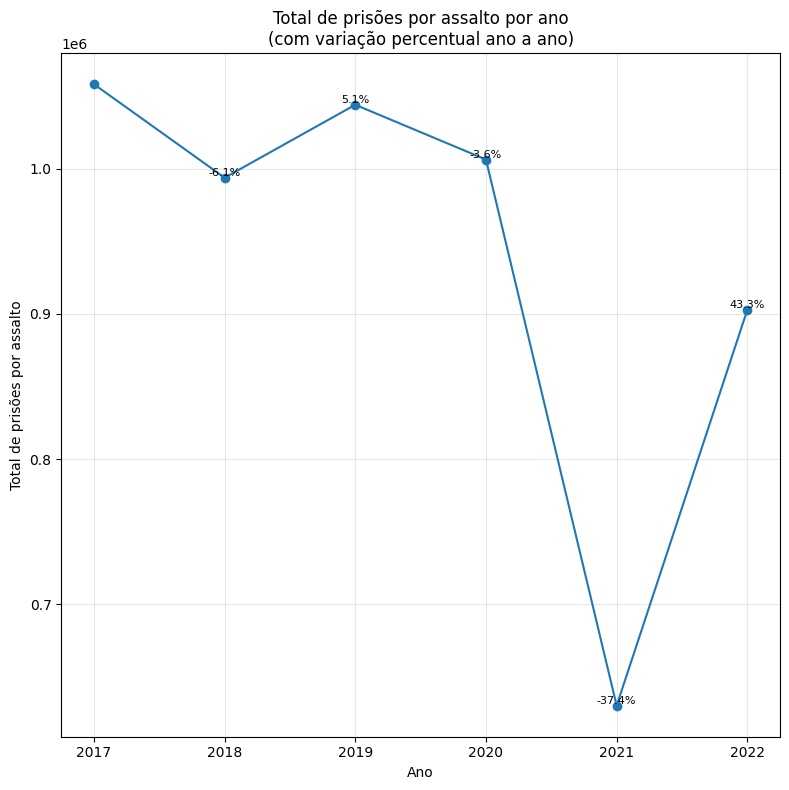

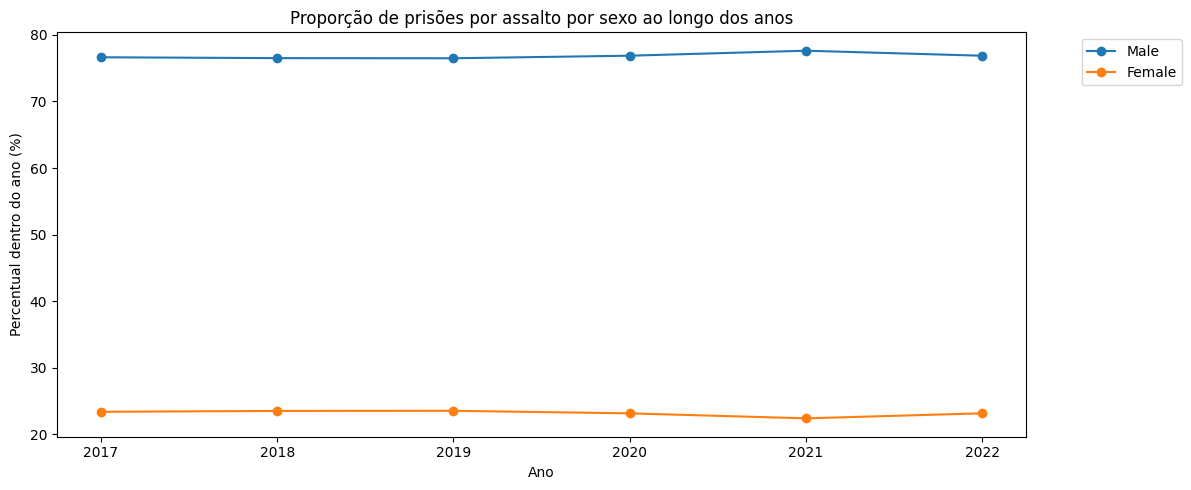

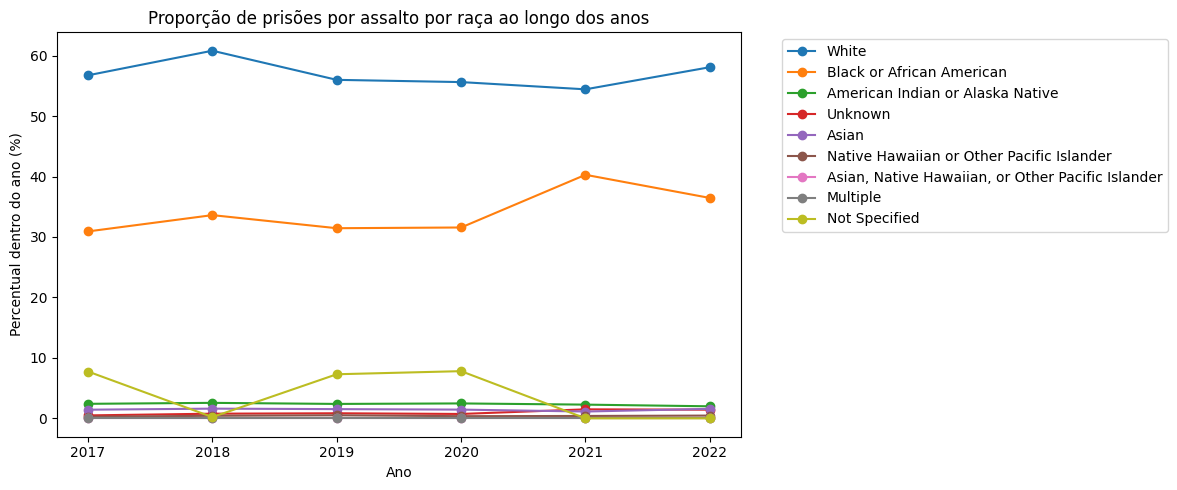

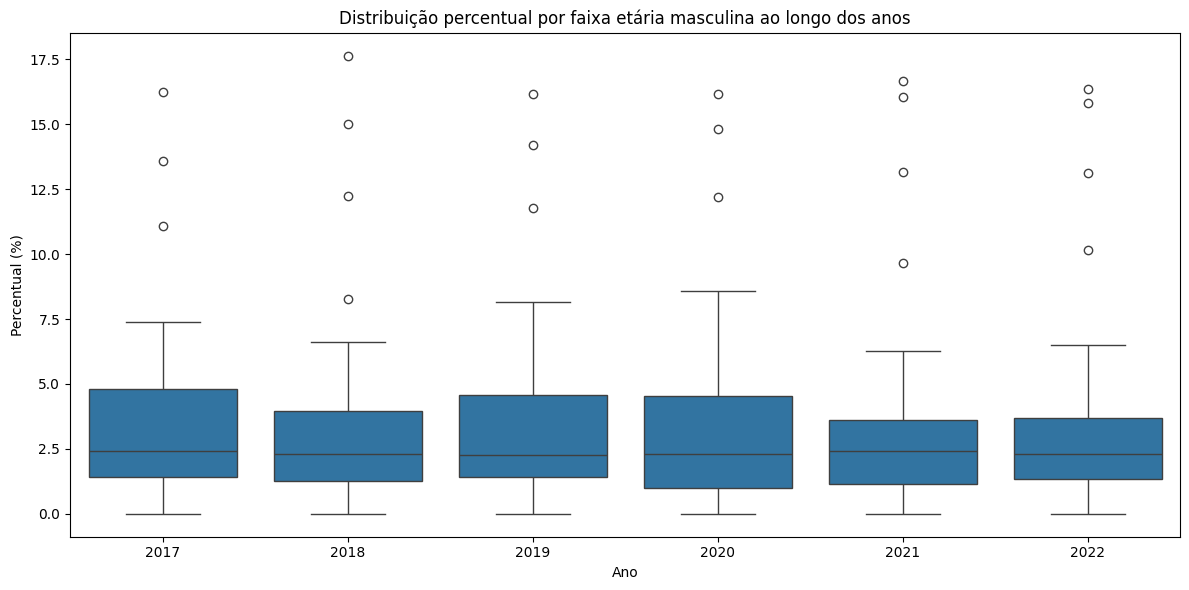

In [30]:
import seaborn as sns

def plot_group(df, title, y_col="quantidade", ylabel="Quantidade"):
    plt.figure(figsize=(12,5))
    for cat in df["categoria"].unique():
        sub = df[df["categoria"] == cat].sort_values("ano")
        plt.plot(sub["ano"], sub[y_col], marker="o", label=cat)
    plt.xlabel("Ano")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend(bbox_to_anchor = (1.05, 1))
    plt.tight_layout()
    plt.show()

# Total de prisões por ano + variação %
df_total_ano = (
    df_final
    .groupby("ano")["quantidade"]
    .sum()
    .reset_index()
    .sort_values("ano")
)
df_total_ano["var_percentual"] = df_total_ano["quantidade"].pct_change() * 100

plt.figure(figsize=(8,8))
plt.plot(df_total_ano["ano"], df_total_ano["quantidade"], marker="o")
for _, row in df_total_ano.iterrows():
    ano = row["ano"]
    qtd = row["quantidade"]
    var = row["var_percentual"]
    if not np.isnan(var):
        plt.text(ano, qtd, f"{var:.1f}%", ha="center", va="bottom", fontsize=8)
plt.xlabel("Ano")
plt.ylabel("Total de prisões por assalto")
plt.title("Total de prisões por assalto por ano\n(com variação percentual ano a ano)")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Recriando df_sex, df_race, df_female_age, df_male_age para ter certeza que tem a coluna 'percentual'
df_sex = df_final[df_final["tipo"] == "sex"]
df_race = df_final[df_final["tipo"] == "race"]
df_female_age = df_final[df_final["tipo"] == "female_age"]
df_male_age   = df_final[df_final["tipo"] == "male_age"]

# Proporção por sexo
plot_group(
    df_sex,
    "Proporção de prisões por assalto por sexo ao longo dos anos",
    y_col="percentual",
    ylabel="Percentual dentro do ano (%)"
)

# Proporção por raça
plot_group(
    df_race,
    "Proporção de prisões por assalto por raça ao longo dos anos",
    y_col="percentual",
    ylabel="Percentual dentro do ano (%)"
)

# Boxplot percentual faixa etária masculina por ano
plt.figure(figsize=(12,6))
sns.boxplot(data=df_male_age, x="ano", y="percentual")
plt.title("Distribuição percentual por faixa etária masculina ao longo dos anos")
plt.xlabel("Ano")
plt.ylabel("Percentual (%)")
plt.tight_layout()
plt.show()

O total anual de prisões por assalto diminui entre 2017 e 2021, com uma queda mais forte em 2020–2021 (período do Covid-19), e volta a crescer em 2022. A recuperação não retorna ao nível inicial, sugerindo uma tendência geral de redução por causa do período da pandemia.
Além disso, pelos gráficos fica evidente que há muitos mais assaltos realizados pelo sexo masculino do que pelo feminino. Por isso, vamos trabalhar mais com análises dos dados dos homens.


Para uma melhor visualização das prisões por assaltos por faixa etária de cada sexo, foi feito um mapa de calor:

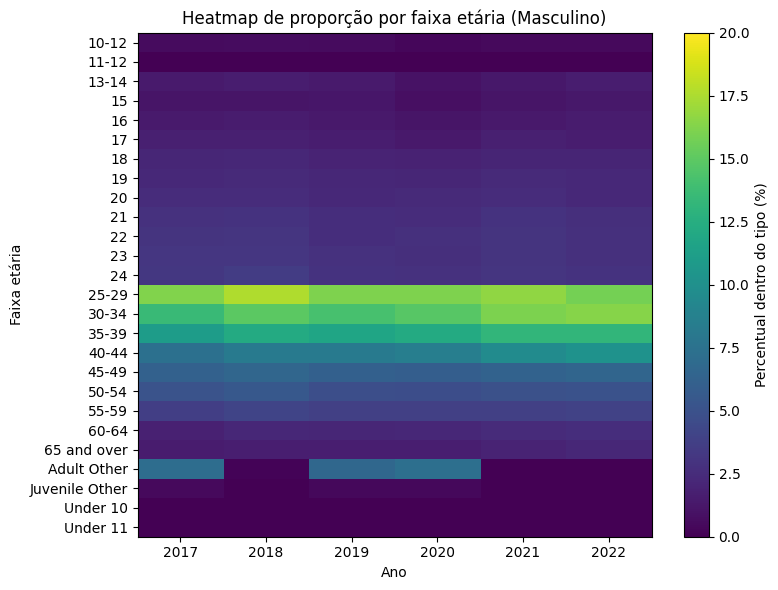

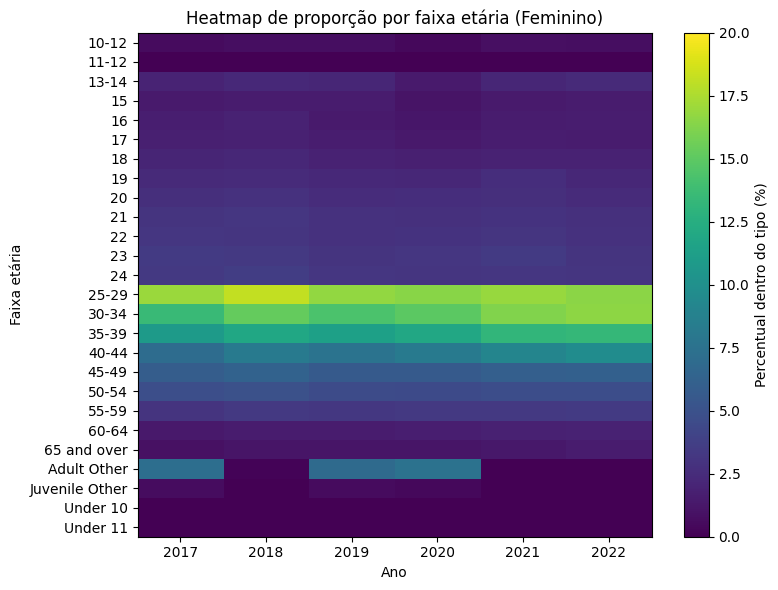

In [31]:
def heatmap_idade(tipo, title):
    df_age = df_final[df_final["tipo"] == tipo]
    tabela = df_age.pivot_table(
        index="categoria",
        columns="ano",
        values="percentual"
    )
    tabela = tabela.sort_index().sort_index(axis=1)

    plt.figure(figsize=(8,6))
    plt.imshow(tabela, aspect="auto", vmax=20, vmin=0)
    plt.colorbar(label="Percentual dentro do tipo (%)")
    plt.xticks(range(len(tabela.columns)), tabela.columns)
    plt.yticks(range(len(tabela.index)), tabela.index)
    plt.xlabel("Ano")
    plt.ylabel("Faixa etária")
    plt.title(title)
    plt.tight_layout()
    plt.show()

heatmap_idade("male_age", "Heatmap de proporção por faixa etária (Masculino)")
heatmap_idade("female_age", "Heatmap de proporção por faixa etária (Feminino)")


Além disso, é possível ver se existe tendência de queda/aumento nas prisões por assalto ao longo dos anos usando as correlações de Spearman e Pearson:

In [32]:
from scipy.stats import pearsonr, spearmanr

# Correlação ano x total
anos = df_total_ano["ano"].values
totais = df_total_ano["quantidade"].values

r_pearson, p_pearson = pearsonr(anos, totais)
r_spearman, p_spearman = spearmanr(anos, totais)

print(f"Correlação Pearson entre ano e total de prisões: {r_pearson:.4f} (p={p_pearson:.3f})")
print(f"Correlação Spearman entre ano e total de prisões: {r_spearman:.4f} (p={p_spearman:.3f})\n")

# Correlação ano x percentual por faixa etária masculina
resultados_corr = []

# df_male is defined in a later cell, so we need to redefine it here first.
df_male = df_final[df_final["tipo"] == "male_age"]

for cat in sorted(df_male["categoria"].unique()):
    dados_cat = df_male[df_male["categoria"] == cat].sort_values("ano")
    anos_cat = dados_cat["ano"].values
    perc_cat = dados_cat["percentual"].values

    if len(anos_cat) < 2:
        continue

    r_p, _ = pearsonr(anos_cat, perc_cat)
    r_s, _ = spearmanr(anos_cat, perc_cat)
    resultados_corr.append((cat, r_p, r_s))

df_corr = pd.DataFrame(resultados_corr, columns=["categoria", "pearson", "spearman"])
print(df_corr.sort_values(by="spearman"))

Correlação Pearson entre ano e total de prisões: -0.6331 (p=0.177)
Correlação Spearman entre ano e total de prisões: -0.7714 (p=0.072)

         categoria   pearson  spearman
24        Under 10 -0.869185 -0.828571
23  Juvenile Other -0.560549 -0.811679
8               20 -0.590399 -0.714286
11              23 -0.739331 -0.714286
12              24 -0.626815 -0.657143
0            10-12 -0.494246 -0.600000
22     Adult Other -0.496617 -0.579771
10              22 -0.405981 -0.542857
5               17 -0.369737 -0.485714
13           25-29 -0.412271 -0.485714
6               18 -0.488789 -0.485714
18           50-54 -0.450995 -0.428571
9               21 -0.367090 -0.257143
7               19 -0.196389 -0.257143
4               16 -0.100009 -0.028571
2            13-14 -0.096496  0.085714
17           45-49  0.063205  0.085714
3               15  0.043393  0.142857
19           55-59  0.133211  0.371429
15           35-39  0.898474  0.771429
14           30-34  0.891214  0.828571
16    

/tmp/ipython-input-1845313847.py:27: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  r_p, _ = pearsonr(anos_cat, perc_cat)
/tmp/ipython-input-1845313847.py:28: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  r_s, _ = spearmanr(anos_cat, perc_cat)


# Seleção dos métodos mais adequados de análise

O objetivo principal não é prever valores numéricos futuros , mas sim agrupar faixas etárias com comportamentos temporais semelhantes. Por isso, não usamos modelos de regressão. Também não se trata de um problema de classificação supervisionada, pois não há rótulos “corretos” a serem aprendidos. Assim, optamos por um método de análise não supervisionada (K-Means) aplicado sobre os vetores temporais de percentuais.

Para comparar padrões de evolução ao longo do tempo,
tratamos cada faixa etária masculina como um vetor com os percentuais
de prisões em cada ano (2017–2022) e aplicamos um método de
agrupamento (K-Means). Assim, grupos com comportamento temporal
semelhante ficam no mesmo cluster.

In [33]:
# Tabela de percentuais por faixa etária masculina x ano
df_male = df_final[df_final["tipo"] == "male_age"]
tabela_ma = df_male.pivot_table(
    index="categoria",
    columns="ano",
    values="percentual"
)
print(tabela_ma)

scaler = StandardScaler()
X = tabela_ma.values
X_scaled = scaler.fit_transform(X)


ano                  2017       2018       2019       2020       2021  \
categoria                                                               
10-12            0.572386   0.668047   0.585698   0.335593   0.472149   
11-12            0.000000   0.000000   0.000000   0.000000   0.000000   
13-14            1.414325   1.562851   1.475132   0.940512   1.323858   
15               1.133309   1.165730   1.202182   0.837044   1.112923   
16               1.443536   1.489500   1.403046   1.108696   1.386402   
17               1.764856   1.780933   1.611044   1.378022   1.731623   
18               2.164934   2.217884   1.985365   1.891099   2.078070   
19               2.326519   2.407572   2.199370   2.166238   2.390792   
20               2.545046   2.569260   2.331903   2.381700   2.525079   
21               2.859710   2.952184   2.603351   2.574297   2.902185   
22               2.980621   3.067337   2.632261   2.779296   2.971475   
23               3.151080   3.128857   2.827493   2

- Para encontrar grupos de categorias com comportamento similar usamos a técnica de K-means:

K=2: inércia=32.29, silhouette=0.758
K=3: inércia=17.80, silhouette=0.582
K=4: inércia=11.45, silhouette=0.477
K=5: inércia=7.48, silhouette=0.512


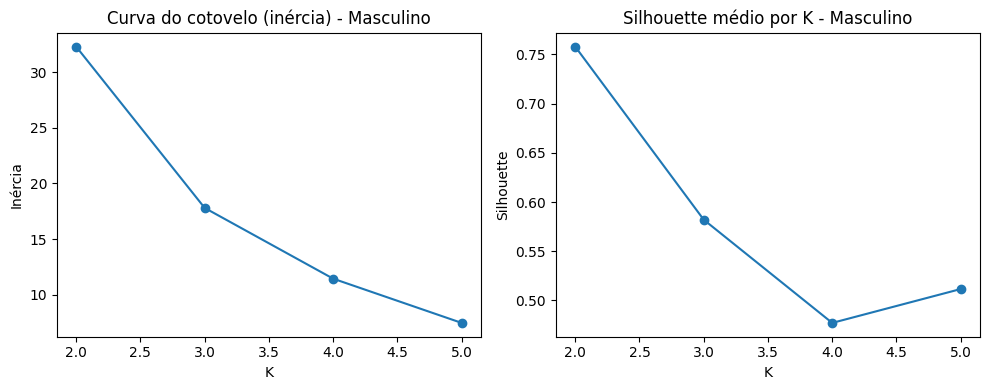

In [34]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

Ks = range(2, 6)
inertias = []
silhouettes = []

for k in Ks:
    km = KMeans(n_clusters=k, n_init=10, random_state=42)
    labels = km.fit_predict(X_scaled)
    inertias.append(km.inertia_)
    sil = silhouette_score(X_scaled, labels)
    silhouettes.append(sil)
    print(f"K={k}: inércia={km.inertia_:.2f}, silhouette={sil:.3f}")

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(list(Ks), inertias, marker="o")
plt.xlabel("K")
plt.ylabel("Inércia")
plt.title("Curva do cotovelo (inércia) - Masculino")

plt.subplot(1,2,2)
plt.plot(list(Ks), silhouettes, marker="o")
plt.xlabel("K")
plt.ylabel("Silhouette")
plt.title("Silhouette médio por K - Masculino")
plt.tight_layout()
plt.show()

In [35]:
best_k = Ks[int(np.argmax(silhouettes))]
print("K escolhido:", best_k)

K escolhido: 2


Testamos valores de K de 2 a 5 e avaliamos a inércia (curva do cotovelo) e o índice de silhouette. Selecionamos K = 2, que apresentou boa redução de inércia e o maior silhouette médio, indicando separação razoável entre grupos de faixas etárias masculinas.

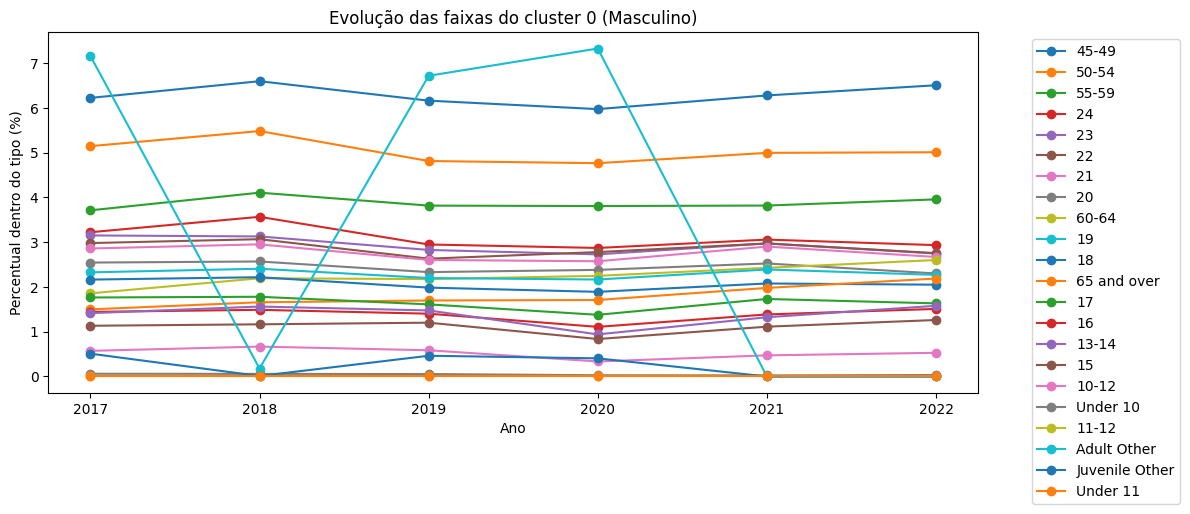

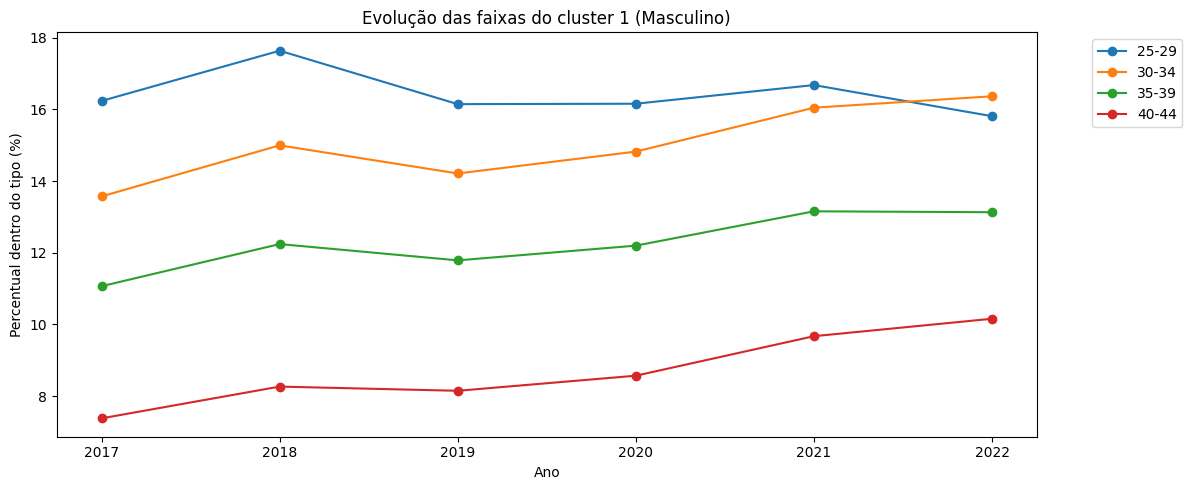

ano                  2017       2018       2019       2020       2021  \
categoria                                                               
10-12            0.572386   0.668047   0.585698   0.335593   0.472149   
11-12            0.000000   0.000000   0.000000   0.000000   0.000000   
13-14            1.414325   1.562851   1.475132   0.940512   1.323858   
15               1.133309   1.165730   1.202182   0.837044   1.112923   
16               1.443536   1.489500   1.403046   1.108696   1.386402   
17               1.764856   1.780933   1.611044   1.378022   1.731623   
18               2.164934   2.217884   1.985365   1.891099   2.078070   
19               2.326519   2.407572   2.199370   2.166238   2.390792   
20               2.545046   2.569260   2.331903   2.381700   2.525079   
21               2.859710   2.952184   2.603351   2.574297   2.902185   
22               2.980621   3.067337   2.632261   2.779296   2.971475   
23               3.151080   3.128857   2.827493   2

In [36]:
# Ajusta K-Means final e visualizar evolução por cluster
km = KMeans(n_clusters=best_k, n_init=10, random_state=42)
clusters = km.fit_predict(X_scaled)

tabela_clusters = tabela_ma.copy()
tabela_clusters["cluster"] = clusters

for c in sorted(tabela_clusters["cluster"].unique()):
    categorias_cluster = tabela_clusters[tabela_clusters["cluster"] == c].index
    sub = df_male[df_male["categoria"].isin(categorias_cluster)]
    plot_group(
        sub,
        f"Evolução das faixas do cluster {c} (Masculino)",
        y_col="percentual",
        ylabel="Percentual dentro do tipo (%)"
    )

print(tabela_clusters.sort_values("cluster"))

O K-Means agrupou as faixas etárias masculinas em um cluster de alta participação (25–44 anos) e outro de baixa/intermediária, mostrando que os assaltos se concentram em adultos jovens.

# Interpretação dos resultados

**1. Tendência Geral de Prisões por Assalto (2017-2022):**
   - O total anual de prisões por assalto nos EUA mostrou uma diminuição geral entre 2017 e 2021,
     com uma queda mais acentuada no período de 2020-2021, provavelmente influenciada pela pandemia de COVID-19.
   - A correlação de Pearson entre o ano e o total de prisões é -0.6331 (p=0.177),
     e a de Spearman é -0.7714 (p=0.072). Ambas indicam uma tendência decrescente,
     embora a significância estatística (p-valor) não seja forte devido ao pequeno número de anos,
     especialmente para Pearson. A correlação de Spearman, que captura monotonicidade, é mais forte,
     sugerindo uma tendência consistente de queda.
   - Houve uma recuperação em 2022, mas o número de prisões não retornou aos níveis iniciais de 2017,
     indicando uma possível mudança no padrão.

**2. Distribuição por Sexo:**
   - Consistentemente ao longo do período, os homens representam uma proporção significativamente maior
     de prisões por assalto em comparação com as mulheres. Este padrão se mantém estável ano a ano.

**3. Distribuição por Raça:**
   - (A análise específica da distribuição por raça dependeria de gráficos e tabelas específicos
     gerados para `df_race`, que precisariam ser interpretados visualmente ou com mais métricas.
     Sem essa análise explícita, podemos apenas afirmar que a proporção por raça foi visualizada.)

**4. Correlação Anual de Faixas Etárias Masculinas:**
   - A análise de correlação (Pearson e Spearman) entre o ano e o percentual de prisões por assalto
     para cada faixa etária masculina revelou padrões distintos:
     - **Tendência Decrescente:** Faixas etárias mais jovens (ex: 'Under 10', 'Juvenile Other', '20', '23', '24', '10-12')
       mostraram fortes correlações negativas, indicando uma diminuição em sua participação percentual
       nas prisões ao longo dos anos.
     - **Tendência Crescente:** Faixas etárias mais velhas (ex: '30-34', '35-39', '40-44', '60-64', '65 and over')
       exibiram fortes correlações positivas, sugerindo que a participação percentual desses grupos nos assaltos
       aumentou no período.
     - **Estabilidade ou pouca mudança:** Algumas faixas etárias intermediárias (ex: '15', '16', '13-14')
       mostraram correlações próximas de zero, indicando uma participação percentual relativamente estável
       ou com flutuações não lineares.

**5. Agrupamento K-Means de Faixas Etárias Masculinas:**
   - O algoritmo K-Means, utilizando K=2 (selecionado com base nos índices de inércia e silhouette),
     agrupou as faixas etárias masculinas em dois clusters principais com base na evolução temporal
     de seus percentuais de prisões.
   - **Cluster 0 (Ex: 10-12, 11-12, 13-14, ..., 24, 45-49, 50-54, 55-59, 60-64, 65 and over,
     Juvenile Other, Adult Other, Under 10, Under 11):** Este cluster geralmente contém faixas etárias
     com menor participação percentual total ou aquelas que mostraram uma tendência de declínio/estabilidade.
     As faixas 'Under 11' e '11-12' têm 0% de participação constante, o que as coloca neste grupo de baixa atividade.
   - **Cluster 1 (Ex: 25-29, 30-34, 35-39, 40-44):** Este cluster representa as faixas etárias com a maior
     participação percentual nas prisões por assalto, e muitas delas demonstraram uma tendência de aumento
     em sua proporção ao longo dos anos. Este grupo pode ser caracterizado como a população adulta jovem
     e e de meia-idade que está proporcionalmente mais envolvida em assaltos, e cuja participação relativa tem crescido.

**Em síntese, os dados apontam para uma diminuição geral nos assaltos,
mas com uma redistribuição demográfica: menos jovens e mais adultos de meia-idade estão sendo presos,
especialmente homens, o que pode indicar mudanças nas dinâmicas sociais ou na aplicação da lei ao longo do tempo.**

# Conclusão



A análise realizada permite identificar padrões significativos na dinâmica das prisões por assalto nos Estados Unidos entre 2017 e 2022,
especialmente considerando o impacto do período da pandemia de COVID-19. Os resultados esperados inicialmente
— de que as taxas de assaltos poderiam diminuir devido ao isolamento social e à permanência das pessoas em casa
— se confirmam parcialmente ao observar a acentuada queda nas prisões entre 2020 e 2021. Embora a recuperação em 2022
indique uma retomada gradual, os níveis não retornaram aos patamares de 2017,
sugerindo que a pandemia pode ter gerado mudanças duradouras no comportamento criminal ou nas práticas de policiamento.

Além da tendência geral de declínio, a pesquisa revela padrões importantes quanto ao perfil dos indivíduos presos por assalto.
A predominância masculina permanece estável ao longo de todo o período, reforçando um comportamento historicamente observado.
No que diz respeito à idade, observa-se uma transformação relevante: enquanto grupos etários mais jovens apresentam
uma redução consistente em sua participação percentual nas prisões, as faixas de adultos jovens e de meia-idade mostram tendência de crescimento.
Esse movimento é confirmado por análises de correlação e pelo agrupamento via K-Means,
que separa claramente faixas de menor atividade — associadas a jovens e grupos com baixa variação —
daquelas com maior envolvimento no crime, representadas principalmente pelos adultos entre 25 e 44 anos.

Em conjunto, esses achados sugerem não apenas uma queda geral nos assaltos durante o período analisado,
mas também uma redistribuição demográfica entre os grupos mais envolvidos nesses delitos.
A pandemia, portanto, não apenas reduziu temporariamente a incidência de assaltos,
como também parece ter influenciado a composição etária dos indivíduos detidos,
possivelmente refletindo mudanças sociais, econômicas e comportamentais mais amplas.

